# Trend Analysis of Videos on Youtube
This analysis is going to cover 

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv(r"E:\General\top-1000-trending-youtube-videos.csv")

In [4]:
df.head()

,rank,Video,Video views,Likes,Dislikes,Category,published
0,1,"20 Tennis shots if they were not filmed, NOBOD...","3,471,237","19,023",859,NaN,2017
1,2,Lil Nas X - Old Town Road (Official Movie) ft....,"54,071,677","3,497,955","78,799",Music,2019
2,3,JoJo Siwa - Karma (Official Video),"34,206,747","293,563",NaN,Music,2024
3,4,Wiz Khalifa - See You Again ft. Charlie Puth [...,"6,643,904,918","44,861,602",NaN,Music,2015
4,5,伊賀の天然水強炭酸水「家族で、シュワシェア。」篇 15秒,"236,085,971",38,NaN,NaN,2021


In [6]:
df.dtypes

rank            int64
Video          object
Video views    object
Likes          object
Dislikes       object
Category       object
published       int64
dtype: object

In [8]:
df[['Video views', 'Likes', 'Dislikes']] = df[['Video views', 'Likes', 'Dislikes']].replace(',', '', regex=True).apply(pd.to_numeric)

In [9]:
df.dtypes

rank             int64
Video           object
Video views      int64
Likes          float64
Dislikes       float64
Category        object
published        int64
dtype: object

In [16]:
most_disliked_video = df.loc[df["Dislikes"].idxmax()]
most_disliked_video

rank                                                           2
Video          Lil Nas X - Old Town Road (Official Movie) ft....
Video views                                             54071677
Likes                                                  3497955.0
Dislikes                                                 78799.0
Category                                                   Music
published                                                   2019
Name: 1, dtype: object

In [17]:
most_liked_video = df.loc[df["Likes"].idxmax()]
most_liked_video

rank                                                           4
Video          Wiz Khalifa - See You Again ft. Charlie Puth [...
Video views                                           6643904918
Likes                                                 44861602.0
Dislikes                                                     NaN
Category                                                   Music
published                                                   2015
Name: 3, dtype: object

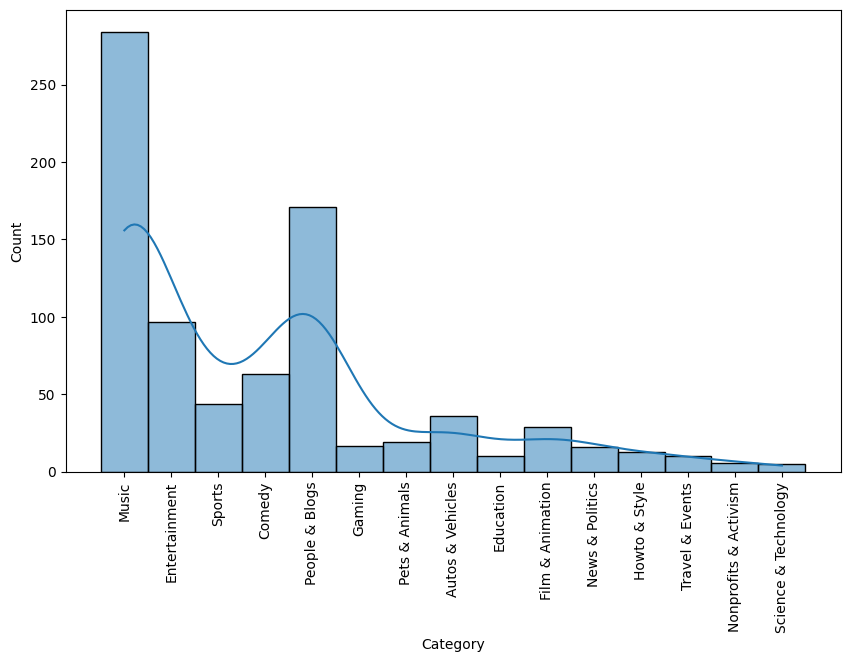

In [32]:

plt.figure(figsize=(10, 6))
sns.histplot(data=df["Category"], bins=20, kde=True)

plt.xticks(rotation=90)

plt.show()


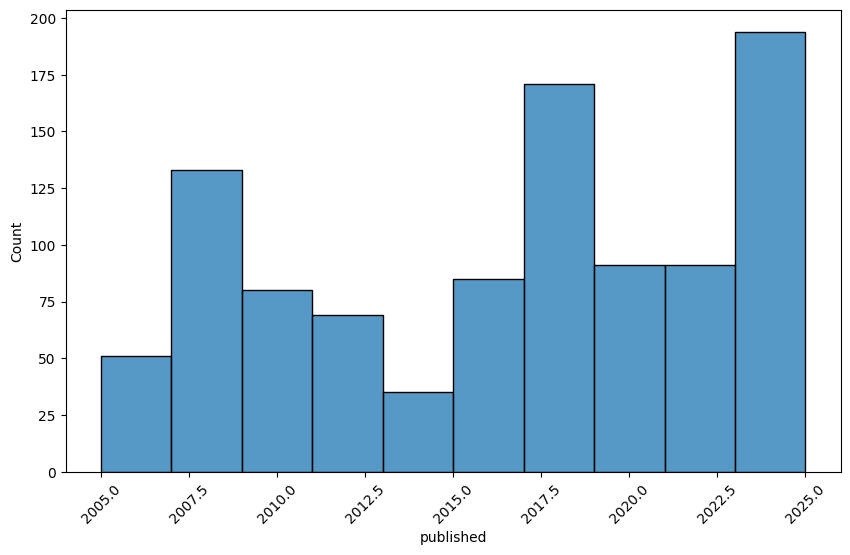

In [38]:

plt.figure(figsize=(10, 6))
sns.histplot(data=df["published"], bins=10)

plt.xticks(rotation=45)

plt.show()


In [40]:
# Group videos by category and calculate average views, likes, and dislikes
category_stats = df.groupby('Category')[['Video views', 'Likes', 'Dislikes']].mean()
print("\nCategory-wise performance:")
print(category_stats)


Category-wise performance:
                        Video views          Likes     Dislikes
Category                                                       
Autos & Vehicles       5.044727e+06    4868.852941   615.529412
Comedy                 1.495517e+07   11793.590164  2397.868852
Education              1.568664e+07   30021.000000   218.333333
Entertainment          1.261306e+07   93051.557895  2274.934783
Film & Animation       8.080827e+06    6927.000000   762.068966
Gaming                 8.363152e+06    9599.294118  1007.764706
Howto & Style          1.689651e+07   87228.923077  1712.500000
Music                  5.731405e+07  409436.595745  3485.183673
News & Politics        5.505164e+06    4105.866667   845.066667
Nonprofits & Activism  2.751268e+06    4509.833333  5324.500000
People & Blogs         1.564207e+07  130898.377246  1153.297468
Pets & Animals         1.199138e+07   31376.631579  2602.789474
Science & Technology   5.524703e+06    2171.750000   403.250000
Sports      

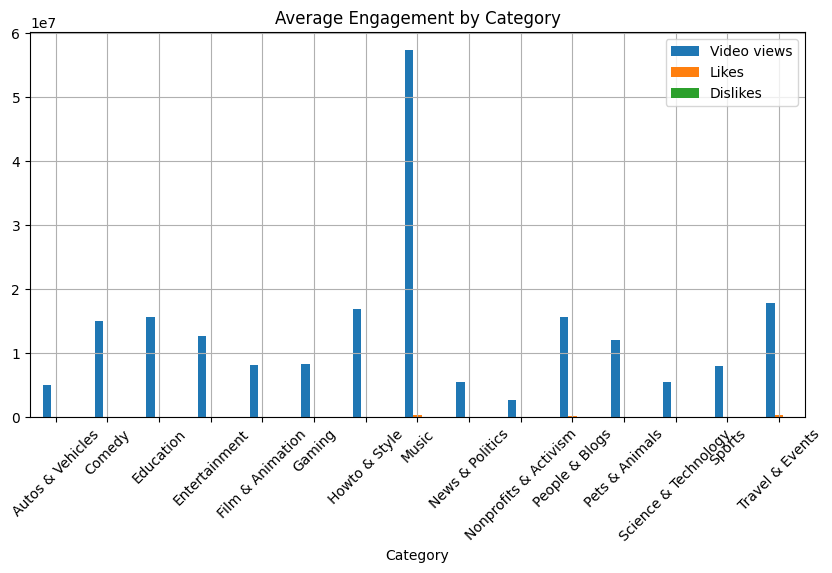

In [43]:
import matplotlib.pyplot as plt

category_stats.plot(kind='bar', figsize=(10,5))

plt.title("Average Engagement by Category")
plt.xticks(rotation=45)
plt.grid()
plt.show()

Correlation Matrix:
             Video views     Likes  Dislikes
Video views     1.000000  0.958319  0.474618
Likes           0.958319  1.000000  0.662887
Dislikes        0.474618  0.662887  1.000000


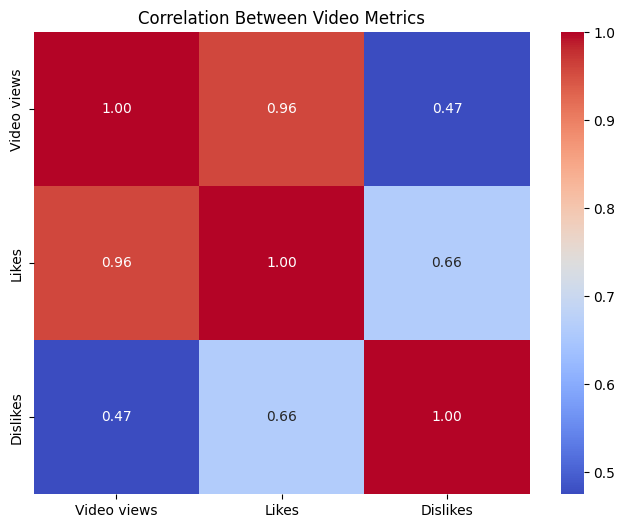

In [45]:


correlation_matrix = df[['Video views', 'Likes', 'Dislikes']].corr()

# Display correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Visualize the correlations using a heatmap
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between Video Metrics")
plt.show()


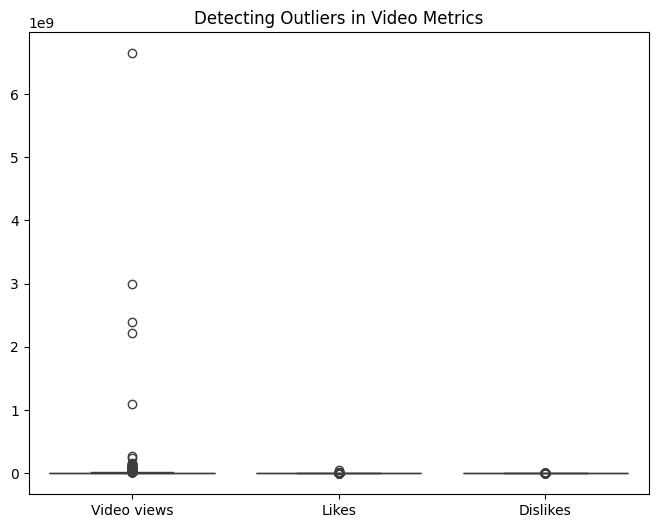


Identified Outliers:
                                                 Video  Video views  \
3    Wiz Khalifa - See You Again ft. Charlie Puth [...   6643904918   
29         6ix9ine - FEFE ft. Nicki Minaj, Murda Beatz   1097393695   
40   Pedro Capó, Farruko - Calma (Remix - Official ...   2993030499   
125  ROSALÍA, J Balvin - Con Altura (Official Video...   2224022798   
321  Jhay Cortez, J. Balvin, Bad Bunny - No Me Cono...   2399769757   

          Likes  Dislikes  
3    44861602.0       NaN  
29    9038575.0       NaN  
40   13840531.0       NaN  
125   9802981.0       NaN  
321   6684120.0       NaN  


In [46]:
import numpy as np

# Using Box Plot for outlier detection
plt.figure(figsize=(8,6))
sns.boxplot(data=df[['Video views', 'Likes', 'Dislikes']])
plt.title("Detecting Outliers in Video Metrics")
plt.show()

# Using Z-score method to identify outliers
from scipy.stats import zscore

df['views_zscore'] = zscore(df['Video views'])
df['likes_zscore'] = zscore(df['Likes'])
df['dislikes_zscore'] = zscore(df['Dislikes'])

# Filter out extreme outliers (Z-score threshold > 3)
outliers = df[(df['views_zscore'].abs() > 3) | (df['likes_zscore'].abs() > 3) | (df['dislikes_zscore'].abs() > 3)]
print("\nIdentified Outliers:")
print(outliers[['Video', 'Video views', 'Likes', 'Dislikes']])
